In [127]:
from functools import partial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import copy
import matplotlib
%matplotlib inline

In [128]:
def generate_random_points(min_x, max_x, min_y, max_y, points_count):
    x = np.random.randint(min_x, max_x, points_count)
    y = np.random.randint(min_y, max_y, points_count)
    points = pd.DataFrame({
        'x':x,
        'y':y
    })
    return points

In [129]:
points = generate_random_points(-100,100,-50,50, 300)
print(points.head())

    x   y
0 -41  45
1  23 -33
2  21  12
3  49  32
4  78  -4


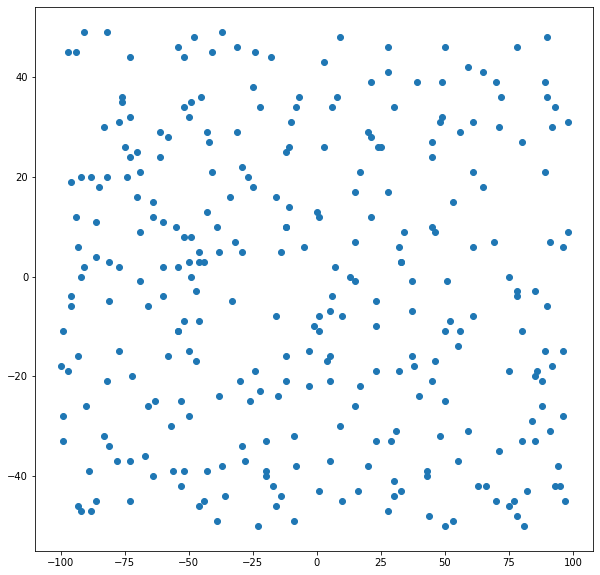

In [130]:
fig = plt.figure(figsize=(10,10))
plt.scatter(points['x'], points['y'])
plt.show()

In [131]:
num_classes = 3

colors = plt.cm.get_cmap('cividis', num_classes).colors
colormap = {i: colors[i] for i in range(num_classes)}

centroids = [[np.random.randint(-100, 100), np.random.randint(-100, 100)] for i in range(num_classes)]

In [132]:
# Take the 2-norm, which is euclidean distance
def distance(df1, df2):
    return np.linalg.norm(df1.values - df2.values, axis=1)

def assign_points_to_classes(points, centroids):
    num_points = points.shape[0]
    centroids = [pd.DataFrame({'x': np.repeat(x, num_points), 'y': np.repeat(y, num_points)}) for x,y in centroids]
    distances = pd.DataFrame({i: distance(points, centroid) for i, centroid in enumerate( centroids ) })
    points['class'] = distances.idxmin(axis=1)
    return points

mapped_points = assign_points_to_classes(points, centroids)

## Split the data randomly into testing and train sets.

In [133]:
x = mapped_points[['x', 'y']]
y = mapped_points['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

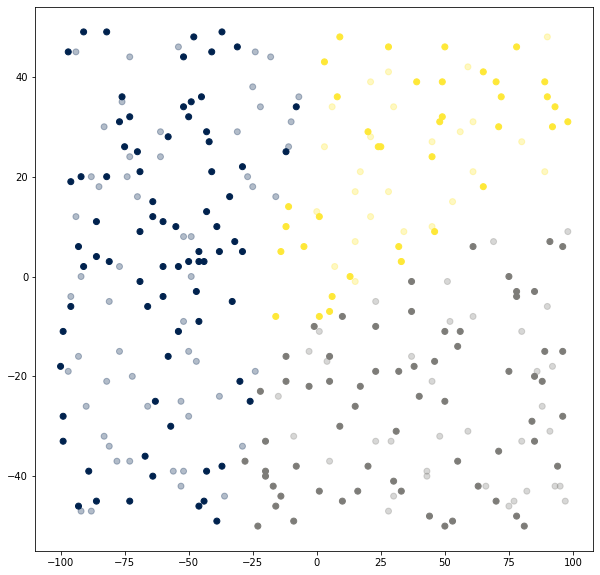

In [134]:
def show_data(dfs, alphas):
    fig = plt.figure(figsize=(10,10))
    for df, alpha in zip(dfs, alphas):
        plt.scatter(df['x'], df['y'], color=[colormap[cl] for cl in df['class']], alpha=alpha)
    plt.show()

show_data((pd.concat([ x_test, y_test ], axis=1), pd.concat([ x_train, y_train ], axis=1)), (0.3, 1))

## Make the predictions and plot

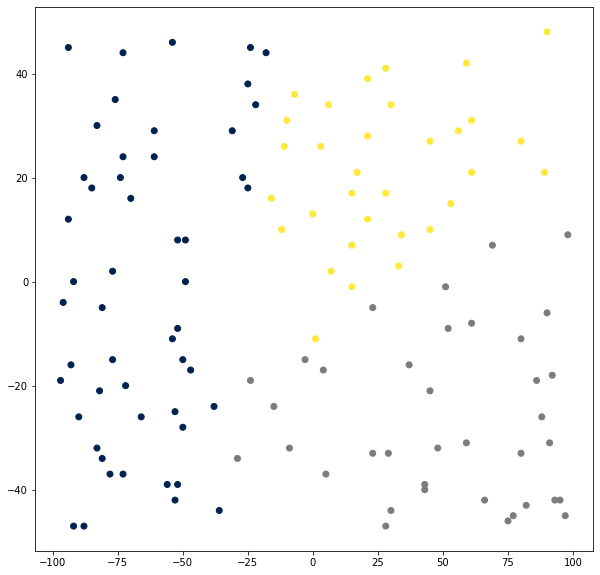

In [135]:
k = 5

def knn_classify(x_test, x_train, y_train, k):
    def knn_classify(point, x_train, y_train, k):
        train_data_size = x_train.shape[0]
        point = pd.DataFrame({'x': np.repeat(point[0], train_data_size), 'y': np.repeat(point[1], train_data_size)})
        distances = pd.DataFrame({'distance': distance(point, x_train), 'class': y_train})
        distances = distances.sort_values('distance')
        k_nearest = distances.head(k)
        return k_nearest['class'].value_counts().index[0]
        
    return pd.Series([knn_classify(x, x_train, y_train, k) for x in x_test.values], name='class')
    
y_pred = knn_classify(x_test, x_train, y_train, k)
test = x_test.reset_index()
test['class'] = y_pred

show_data((test,), (1,))

## Confusion matrix

[[51  2  4]
 [ 0 35  1]
 [ 0  0 27]]


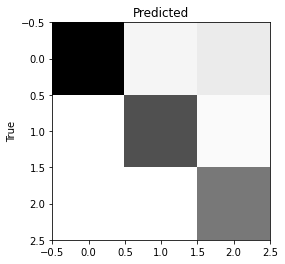

In [138]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
ax = plt.axes()
ax.set_ylabel('True')
ax.set_title('Predicted')
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()